In [1]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Copyright (c) 2021. Mohamed Reda Bouadjenek, Deakin University              +
#           Email:  reda.bouadjenek@deakin.edu.au                              +
#                                                                              +
#  Licensed under the Apache License, Version 2.0 (the "License");             +
#   you may not use this file except in compliance with the License.           +
#    You may obtain a copy of the License at:                                  +
#                                                                              +
#                 http://www.apache.org/licenses/LICENSE-2.0                   +
#                                                                              +
#    Unless required by applicable law or agreed to in writing, software       +
#    distributed under the License is distributed on an "AS IS" BASIS,         +
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  +
#    See the License for the specific language governing permissions and       +
#    limitations under the License.                                            +
#                                                                              +
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Sections of this code have been modified by Bevan Fairleigh
# (bfairleigh@deakin.edu.au) as part of the Deakin University Simpsons 
# Challenge.  Modified sections have been identified by comments, 
# or by section of Markup before the code block.
#
# Full details of the process behind this model can be found in the included
# report
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



**Notebook author:** [Mohamed Reda Bouadjenek](https://rbouadjenek.github.io/), Lecturer of Applied Artificial Intelligence,

**Institution:** Deakin University, School of Information Technology, Faculty of Sci Eng & Built Env

**Adress:** Locked Bag 20000, Geelong, VIC 3220

**Phone:** +61 3 522 78380

**Email:** reda.bouadjenek@deakin.edu.au


### Modified for Simpsons Competition by

**Notebook author:** [Bevan Fairleigh](https://github.com/bevanyeah), Student of Applied Artificial Intelligence,

**Institution:** Deakin University, School of Information Technology, Faculty of Sci Eng & Built Env



**Adress:** Locked Bag 20000, Geelong, VIC 3220

**Phone:** +61 403 885 586

**Email:** bfairleigh@deakin.edu.au

<img style="float: left;" src="images/deakin2.png" width="200">

In [2]:
# # Run this to install the appropriate tensorflow package
!pip install tensorflow==2.2.0

Once the appropriate TensorFlow version installed, you need now to load all the required packages for this Notebook.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers
from tensorflow.python.keras.saving import hdf5_format
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools

# ##################
# # Additional Libraries required for Bevan's solution
# ##################

from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop


##################
# Verifications:
#################
print('GPU is used.' if len(tf.config.list_physical_devices('GPU')) > 0 else 'GPU is NOT used.')
print("Tensorflow version: " + tf.__version__)

print (tf.config.list_physical_devices('GPU'))


GPU is used.
Tensorflow version: 2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Bevan's code

In order to access my supplemented training dataset, I need to mount my google drive now.

In [4]:
#mount the google drive here instead
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Now we need to run the following command to download the specific simpsons_train.zip dataset from my google drive.
This file has been made public.

In [5]:
# # # # Download dataset:

#This is the simpsons_train.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mbdOMc6bh4HlKbH0TgSuJ2CXSM47dZbL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mbdOMc6bh4HlKbH0TgSuJ2CXSM47dZbL" -O simpsons_train.zip && rm -rf /tmp/cookies.txt


--2021-06-01 11:17:23--  https://docs.google.com/uc?export=download&confirm=FoQZ&id=1mbdOMc6bh4HlKbH0TgSuJ2CXSM47dZbL
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.138, 172.217.203.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1k-docs.googleusercontent.com/docs/securesc/llv0tk0gsjnanech38rr6if6upnsgbmp/mi7ieg3cfbl41j4ih81k2fk3qilua19p/1622546175000/12560144487081999482/17034714705408202856Z/1mbdOMc6bh4HlKbH0TgSuJ2CXSM47dZbL?e=download [following]
--2021-06-01 11:17:23--  https://doc-0s-1k-docs.googleusercontent.com/docs/securesc/llv0tk0gsjnanech38rr6if6upnsgbmp/mi7ieg3cfbl41j4ih81k2fk3qilua19p/1622546175000/12560144487081999482/17034714705408202856Z/1mbdOMc6bh4HlKbH0TgSuJ2CXSM47dZbL?e=download
Resolving doc-0s-1k-docs.googleusercontent.com (doc-0s-1k-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connect

And now, we can unzip the dataset

In [6]:
!unzip simpsons_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_train/moe_szyslak/018333.jpg  
  inflating: simpsons_train/moe_szyslak/018334.jpg  
  inflating: simpsons_train/moe_szyslak/018335.jpg  
  inflating: simpsons_train/moe_szyslak/018336.jpg  
  inflating: simpsons_train/moe_szyslak/018337.jpg  
  inflating: simpsons_train/moe_szyslak/018338.jpg  
  inflating: simpsons_train/moe_szyslak/018339.jpg  
  inflating: simpsons_train/moe_szyslak/018340.jpg  
  inflating: simpsons_train/moe_szyslak/018341.jpg  
  inflating: simpsons_train/moe_szyslak/018342.jpg  
  inflating: simpsons_train/moe_szyslak/018343.jpg  
  inflating: simpsons_train/moe_szyslak/018344.jpg  
  inflating: simpsons_train/moe_szyslak/018345.jpg  
  inflating: simpsons_train/moe_szyslak/018346.jpg  
  inflating: simpsons_train/moe_szyslak/018347.jpg  
  inflating: simpsons_train/moe_szyslak/018348.jpg  
  inflating: simpsons_train/moe_szyslak/018349.jpg  
  inflating: simpsons_train/moe_szyslak/018350.j

# Preprocessing


### Bevan's Code

In this section, we take the custom dataset and load it into a directory iterator, which also performs data augmentation in order to perturb and supplement our training data with sufficient noise.  As outlined in the accompanying report, this same dataset is loaded into the validation directory iterator, but without the Data augmentation.

As controversial as this process might seem, this provided the highest scoring model of all our tests, and results in 99%+ scores on the hidden training sets.



In [7]:
'''
    Split train and validation.
'''
# We define the size of input images to 128x128 pixels.
# Bevan has modified this to allow image size of 224, 224
image_size = (224, 224)

# We define the batch size
batch_size = 32
input_shape=image_size + (3,)

# Bevan's Code
# This is the Training data set.  Note that it is not split into Train/Validation
# Data augmentation hyper-parameters have been tuned for optimal output.

image_generator = ImageDataGenerator(
    validation_split=0.0, # The use of a non split dataset is explained in the accompanied report
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zoom_range=(0.6,1.8),
    rotation_range=35,  # randomly rotate images in the range (degrees, 0 to 180)
    brightness_range=(0.6,1.8),
    shear_range=50,
    #channel_shift_range=.7,
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    #vertical_flip=True)  # randomly flip images
)

# This is the validation set.  Note that it is not split either, and has no data augmentation applied
test_gen = ImageDataGenerator(validation_split=0.0)


# Now, we create a training data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 64x64 pixels format.
train_ds =  DirectoryIterator(
    'simpsons_train/',
    image_generator,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'training',
    shuffle=True
)

# Similarly, we create a validation data iterator by creating batchs of images of the same size as 
# defined previously, i.e., each image is resized in a 224x224 pixels format.
val_ds = DirectoryIterator(
    'simpsons_train/',
    test_gen,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'training',  #We need to set this to training so that this set is using 100% of the training set
    shuffle=False
)

# We save the list of classes (labels).
class_names = list(train_ds.class_indices.keys())

print(class_names)

# We also save the number of labels.
num_classes = train_ds.num_classes
print(num_classes)

#The 2 datasets should be the same size, although, the training set will contained perturbed images
# as part of the data augmentation process


Found 23333 images belonging to 20 classes.
Found 23333 images belonging to 20 classes.
['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lisa_simpson', 'marge_simpson', 'mayor_quimby', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner', 'sideshow_bob']
20


# Exploring the data

Now, we do data exploration to show you samples of the images and their labels and some statistics to help you in understanding the data.

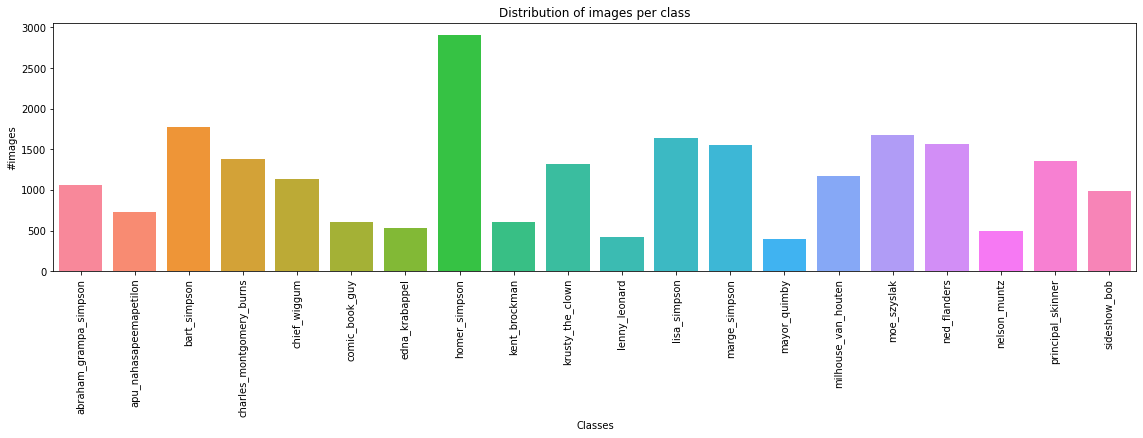

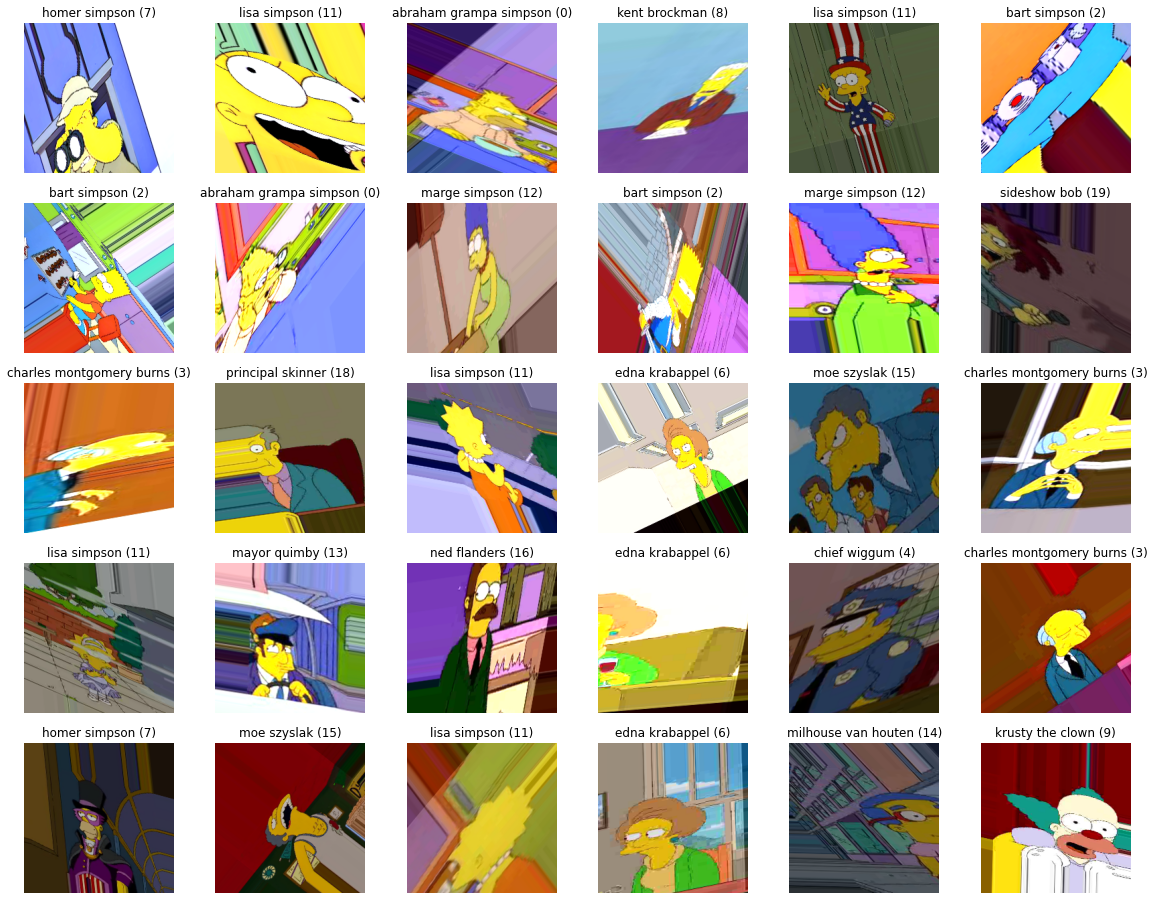

In [8]:
###############################################
#### Show distribution of images per class.
###############################################
counter=collections.Counter(train_ds.labels)
v = [ [class_names[item[0]],item[1]]  for item in counter.items()]
df = pd.DataFrame(data=v, columns=['index','value'])
g = sns.catplot(x='index', y= 'value',  data=df, kind='bar', 
                legend=False,height=4,aspect=4,saturation=1)
(g.despine(top=False,right=False))
plt.xlabel("Classes")
plt.ylabel("#images")
plt.title("Distribution of images per class")
plt.xticks(rotation='vertical')
plt.show()

#####################################
######### Show sample of images.
#####################################
plt.figure(figsize=(20, 16))
images = []
labels = []
for itr in train_ds.next():
    
    for i in range(30):
        if len(images) < 30:
            images.append(itr[i].astype("uint8"))
        else:
            labels.append(list(itr[i]).index(1))

for i in range(len(images)):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]].replace('_',' ') +' ('+str(int(labels[i]))+')')
    plt.axis("off")
    


# Designing the model



In [9]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import categorical_crossentropy


## Bevan's code

In the following cell, we are going to load a pre-trained Xception model as part of the Keras libraries.  This will allow us to train a model much faster, as we have a good starting point.

The new top of the model will contain the input layer of our image size (224,224).
The new activation layer will be a ReLU, followed by a final softmax activation to classify images into one of 20 classes.

Experimentation was done to determine the best alpha value to use for Leaky ReLU, but results were equivilent to standard ReLU.

The optimizer has been selected as RMSprop, as this gave the best generalisation accuracy.  The Learning rate was lowered incrementally as a new lowest Validation Loss was discovered. 

#### For information.  
Xception1 was a custom model from scratch.  Xception2 was a pre-trained model using frozen layers.  Xception3 (this model) was all layers unfrozen.


In [10]:
#Load Xception from pre-trained 

base_model = Xception(include_top=False,weights='imagenet',
input_shape=(224, 224, 3))

#Create the new output layers of our model using standard Relu
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)

#Build the model using the specified inputs and the newly constructed output layers
xception3 = keras.Model(inputs=base_model.inputs, outputs=predictions)

#Ensure that all layers in the new model are re-trainable (just in case)
for layer in xception3.layers:
  layer.trainable = True

#Set the metrics as categorical accuracy
metric = [keras.metrics.categorical_accuracy]

#Configure our optimizer as RMSprop (lr starting at 0.0001 for now)
# RMSprop was shown to perform better at model generalisation compared to adam or SGD
optimizer = optimizers.RMSprop(lr=0.0001)

#Ensure loss is set to categorical crossentropy to enable multiclass classification
loss=categorical_crossentropy

#When working with many models, it makes sense to name the model a logical name
filepath="Relu_AllAugs_fulltraining.h5"

# Set our checkpoint so that we can recall our weights of the best performing model
# best performing model is determined by lowest validation Loss score
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

#Compile our model
xception3.compile(
  optimizer,
  loss,
  metric
)

In [11]:
# Run the model for 50 epochs, and then save to Google drive

historyOne = xception3.fit(train_ds, epochs=50, batch_size=64, validation_data=val_ds,callbacks=callbacks_list)
!cp $filepath 'drive/My Drive/'

Epoch 1/50
730/730 [==============================] - ETA: 0s - loss: 0.9937 - categorical_accuracy: 0.7132
Epoch 00001: val_loss improved from inf to 0.21956, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 376s 515ms/step - loss: 0.9937 - categorical_accuracy: 0.7132 - val_loss: 0.2196 - val_categorical_accuracy: 0.9349
Epoch 2/50
730/730 [==============================] - ETA: 0s - loss: 0.4151 - categorical_accuracy: 0.8771
Epoch 00002: val_loss improved from 0.21956 to 0.15067, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 374s 512ms/step - loss: 0.4151 - categorical_accuracy: 0.8771 - val_loss: 0.1507 - val_categorical_accuracy: 0.9540
Epoch 3/50
730/730 [==============================] - ETA: 0s - loss: 0.3205 - categorical_accuracy: 0.9056
Epoch 00003: val_loss improved from 0.15067 to 0.08175, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 377s 516ms/step 

In [12]:
# Ok, now we can load the best performing model weights, reduce the learning rate, and train further

# reduce optimimer to lr = 0.00001
optimizer = optimizers.RMSprop(lr=0.00001)

# Recompile model with new optimizer
xception3.compile(
  optimizer,
  loss,
  metric
)

# Load weights from best performing model from last training run
xception3.load_weights(filepath)

#Run for 10 epochs, this will not take long to find a new minimum
historyTwo = xception3.fit(train_ds, epochs=10, batch_size=64, validation_data=val_ds,callbacks=callbacks_list)

!cp $filepath 'drive/My Drive/'

Epoch 1/10
730/730 [==============================] - ETA: 0s - loss: 0.0898 - categorical_accuracy: 0.9778
Epoch 00001: val_loss improved from 0.00322 to 0.00069, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 375s 514ms/step - loss: 0.0898 - categorical_accuracy: 0.9778 - val_loss: 6.8990e-04 - val_categorical_accuracy: 0.9998
Epoch 2/10
730/730 [==============================] - ETA: 0s - loss: 0.0724 - categorical_accuracy: 0.9814
Epoch 00002: val_loss improved from 0.00069 to 0.00065, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 380s 521ms/step - loss: 0.0724 - categorical_accuracy: 0.9814 - val_loss: 6.5297e-04 - val_categorical_accuracy: 0.9998
Epoch 3/10
730/730 [==============================] - ETA: 0s - loss: 0.0678 - categorical_accuracy: 0.9812
Epoch 00003: val_loss improved from 0.00065 to 0.00045, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 378s

In [13]:
# Ok, now we do this one more time
# reduce optimimer to lr = 0.000001
optimizer = optimizers.RMSprop(lr=0.000001)

# Recompile model with new optimizer
xception3.compile(
  optimizer,
  loss,
  metric
)

# Load weights from best performing model from last training run
xception3.load_weights(filepath)

#Run for 10 epochs, this will not take long to find a new minimum
historyThree = xception3.fit(train_ds, epochs=10, batch_size=64, validation_data=val_ds,callbacks=callbacks_list)

!cp $filepath 'drive/My Drive/'


Epoch 1/10
730/730 [==============================] - ETA: 0s - loss: 0.0669 - categorical_accuracy: 0.9834
Epoch 00001: val_loss did not improve from 0.00045
730/730 [==============================] - 372s 509ms/step - loss: 0.0669 - categorical_accuracy: 0.9834 - val_loss: 4.8140e-04 - val_categorical_accuracy: 0.9999
Epoch 2/10
730/730 [==============================] - ETA: 0s - loss: 0.0611 - categorical_accuracy: 0.9836
Epoch 00002: val_loss improved from 0.00045 to 0.00045, saving model to Relu_AllAugs_fulltraining.h5
730/730 [==============================] - 371s 508ms/step - loss: 0.0611 - categorical_accuracy: 0.9836 - val_loss: 4.5018e-04 - val_categorical_accuracy: 0.9999
Epoch 3/10
730/730 [==============================] - ETA: 0s - loss: 0.0689 - categorical_accuracy: 0.9813
Epoch 00003: val_loss did not improve from 0.00045
730/730 [==============================] - 373s 511ms/step - loss: 0.0689 - categorical_accuracy: 0.9813 - val_loss: 4.7396e-04 - val_categorical_a

In [14]:

#now that we are finished, we need to save our completed model with the appropriate attributes to enable judging by the
# competition (i.e. classnames and images size)

# load the best performing model
load_model = filepath
model = tf.keras.models.load_model(load_model)

#Update the name to reflect that it's our complete model
modelFilename = 'Completed_smallestLR_Relu_AllAugs_fulltraining.h5'

with h5py.File(modelFilename, mode='w') as f:
    hdf5_format.save_model_to_hdf5(model, f)
    f.attrs['class_names'] = class_names
    f.attrs['image_size'] = image_size
!cp $modelFilename 'drive/My Drive/'

#Let's load the model back from google to ensure we are testing the correct model file, and the save was completed correctly
model = tf.keras.models.load_model('drive/My Drive/'+modelFilename)

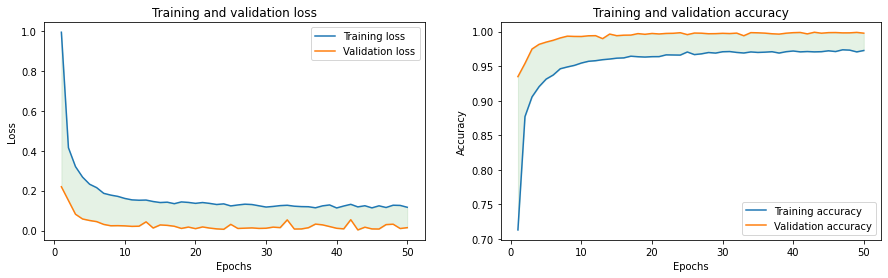

In [15]:
#We now have three training runs of data, but the most valuable to see the relationship between training accuracy
# and validation accuracy is the first history.

history = historyOne

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Run the `classification_report` function below to build a text report showing the main classification metrics for your model:

In [16]:
val_ds.reset()
val_ds.shuffle = False
val_ds.next()
y_prob = model.predict(val_ds)
y_pred = y_prob.argmax(axis=-1)
y_true = val_ds.labels
print(classification_report(y_true, y_pred, target_names=class_names))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      1.00      1.00      1057
  apu_nahasapeemapetilon       1.00      1.00      1.00       728
            bart_simpson       1.00      1.00      1.00      1779
charles_montgomery_burns       1.00      1.00      1.00      1385
            chief_wiggum       1.00      1.00      1.00      1136
          comic_book_guy       1.00      1.00      1.00       604
          edna_krabappel       1.00      1.00      1.00       532
           homer_simpson       1.00      1.00      1.00      2913
           kent_brockman       1.00      1.00      1.00       610
        krusty_the_clown       1.00      1.00      1.00      1322
           lenny_leonard       1.00      1.00      1.00       417
            lisa_simpson       1.00      1.00      1.00      1638
           marge_simpson       1.00      1.00      1.00      1551
            mayor_quimby       1.00      1.00      1.00       401
     milh

Run the  next cell to create a confusion matrix function `plot_confusion_matrix`.

In [17]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    vmax = cm.max()
    if normalize:
        title = 'Confusion matrix (normalized)'
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = [[int(j*100) for j in i ] for i in cm]
        cm =np.array(cm)
        vmax = 100
        
    plt.figure(figsize=(8,8))

    im = plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=vmax)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar(im,fraction=0.046, pad=0.04)


Let's now create the confusion matrix.

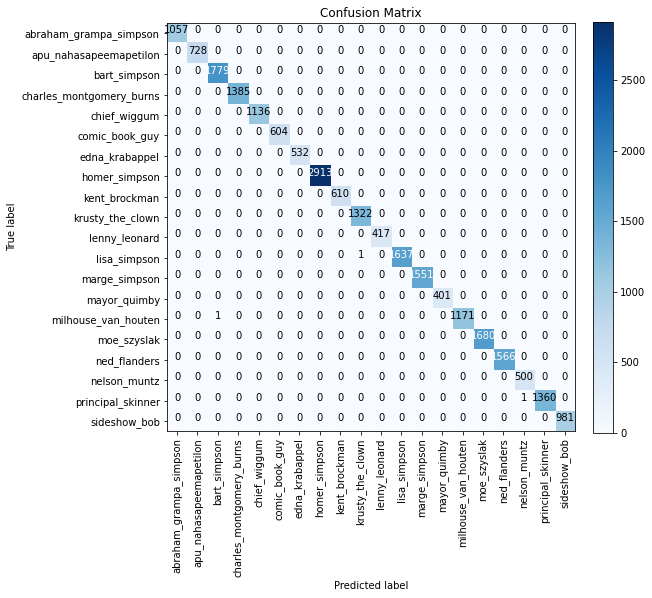

In [18]:
val_ds.reset()
val_ds.shuffle = False
val_ds.next()
# y_prob = model.predict(val_ds)
y_pred = y_prob.argmax(axis=-1)
y_true = val_ds.labels
cnf_matrix = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm=cnf_matrix, classes=class_names, title='Confusion Matrix', normalize=False)


Have a look at the confusion matrix, and observe what classes are confused with each other.

Let's now have a look at example of predictions made by your model:

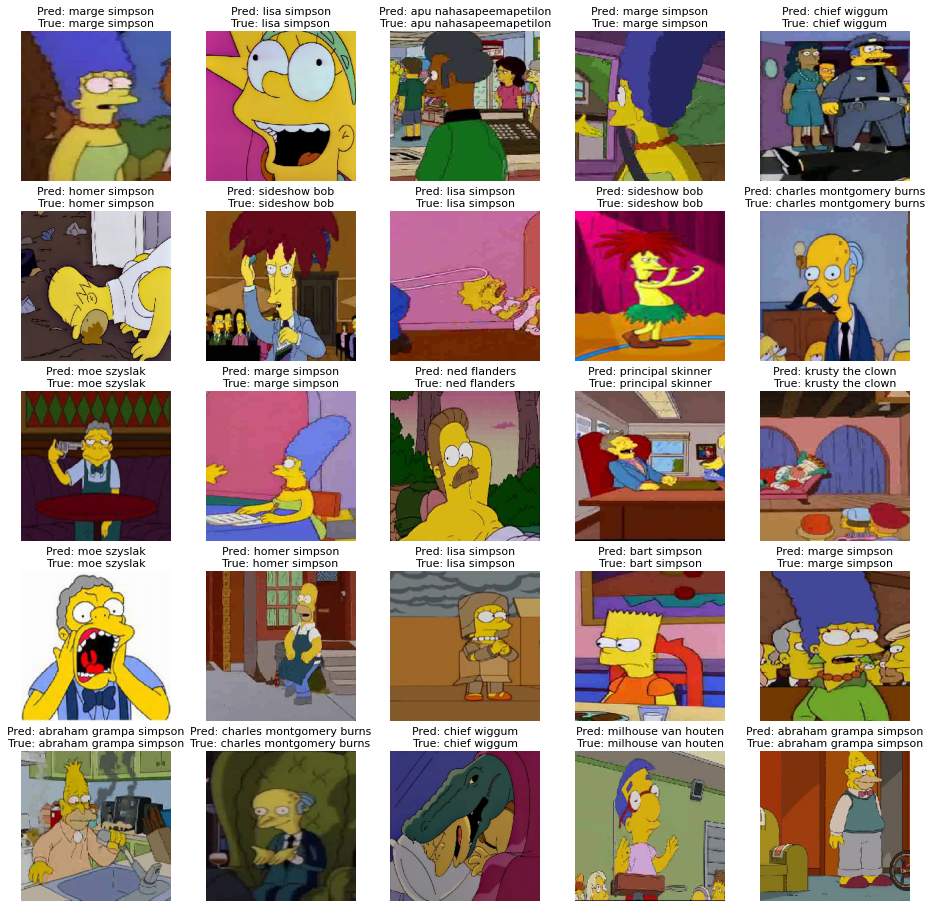

In [19]:
val_ds.reset()
val_ds.shuffle = True
#####################################
######### Show sample of images.
#####################################
plt.figure(figsize=(16, 16))
images = []
labels_pred = []
labels_true = []
for itr in val_ds.next():
    for i in range(25):
        if len(images) < 25:
            images.append(itr[i].astype("uint8"))
            y_proba = model.predict(np.array([itr[i]]))
            y_pred = np.argmax(y_proba,axis=1)[0]
            labels_pred.append(y_pred)
        else:
            labels_true.append(list(itr[i]).index(1))
    

for i in range(len(images)):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])    
    title = 'Pred: ' + class_names[labels_pred[i]].replace('_',' ') +'\n' +'True: ' + class_names[labels_true[i]].replace('_',' ') 
    
    
    plt.title(title,fontsize= 11, pad=5)
    plt.axis("off")
#     plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1, wspace=None, hspace=None)


# Acknowledgment


**Author:** [Mohamed Reda Bouadjenek](https://rbouadjenek.github.io/), Lecturer of Applied Artificial Intelligence, 

**Institution:** Deakin University, School of Information Technology, Faculty of Sci Eng & Built Env

**Adress:** Locked Bag 20000, Geelong, VIC 3220

**Phone:** +61 3 522 78380

**Email:** reda.bouadjenek@deakin.edu.au

**www.deakin.edu.au**

<div>
<img style="float: left;" src="images/deakin2.png" width="200" >
</div>
<br>
<br>
<br>
<br>

<div>  <a href="https://twitter.com/DeakinAI2021" > <img style="float: left;" src="https://irisconnect.com/uk/wp-content/uploads/sites/3/2020/12/twitter-Follow-us-button.png" width="200" > </a>
</div>